# Feature Engineering

# 1) One Hot Encoding - To handle Variables with many categories

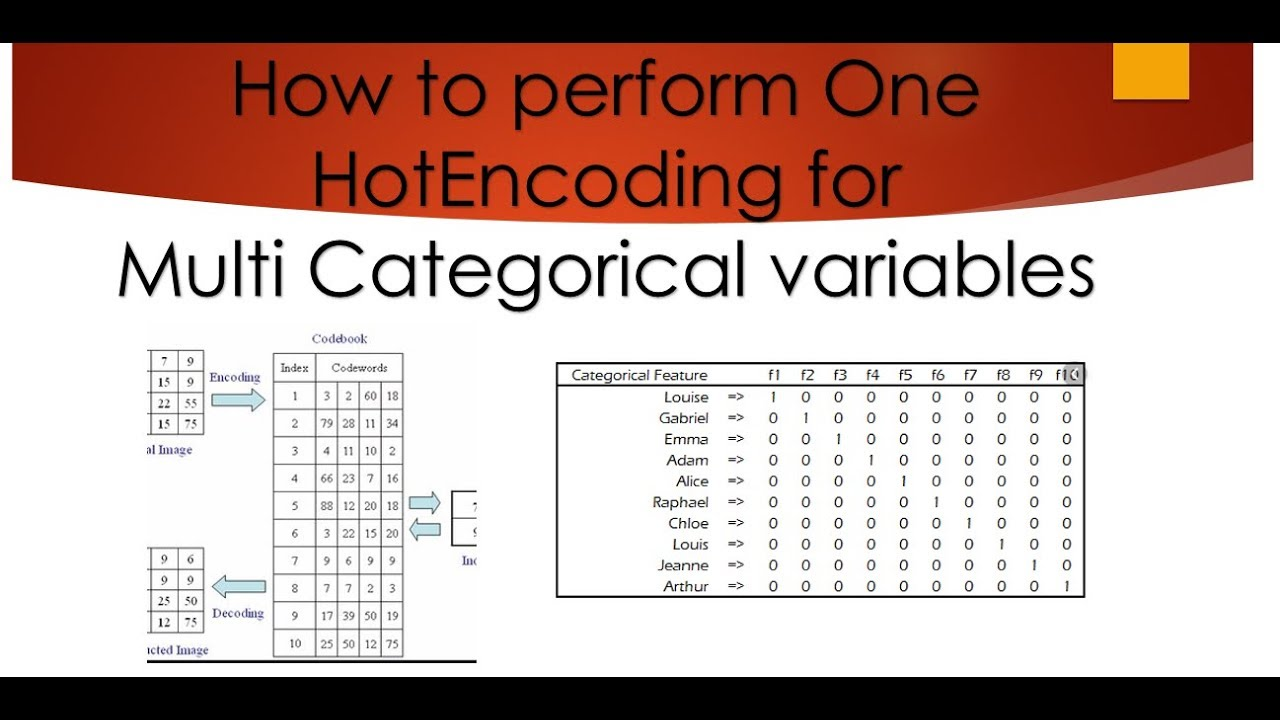

# Example 1) with Titanic Data Set

In [48]:
import pandas as pd
df1 = pd.read_csv('titanic_train.csv')
# Download Link: https://www.kaggle.com/c/titanic/data?select=train.csv
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
#cant read all 12 columns in above dataframe. So,
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
# lets focus on particular columns / features
df1 = pd.read_csv('titanic_train.csv',usecols=['Sex'])
df1

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [51]:
#"one hot encoding" splits the column into number of categories available
pd.get_dummies(df1)
# alphabetically sorting : F for Female then M for Male

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [52]:
pd.get_dummies(df1,drop_first=True) #dropped 1st column
# 2-1 = 1 column is enough. 
# Because, If Sex_male = 0, it means Sex_female

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [53]:
#lets analyse new feature "Embarked"
df2 = pd.read_csv('titanic_train.csv',usecols=["Embarked"])
df2

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [54]:
df2['Embarked'].unique() #Different categories available in the feature "Embarked"

array(['S', 'C', 'Q', nan], dtype=object)

In [55]:
pd.get_dummies(df2)  #one hot encoding

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [56]:
df2.dropna(inplace=True)
df2 #891-889 - 2 Nan values are dropped

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [57]:
pd.get_dummies(df2)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [58]:
pd.get_dummies(df2,drop_first=True)

# again, 3-1 = 2 columns are enough
# because if (Q,S) = (0,0) then P = 1

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


# Dis-advantage
1) create several features

# Example 2.1) MERECEDES BENZ database

In [1]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('mercedesbenz.csv') # Loading MERECEDES BENZ database
data1

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [2]:
for col in data1.columns:
    print(col, ':', len(data1[col].unique()),'labels')
# finding the number of UNIQUE variable available in each label (X1 to X385)

ID : 4209 labels
y : 2545 labels
X0 : 47 labels
X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels
X8 : 25 labels
X10 : 2 labels
X11 : 1 labels
X12 : 2 labels
X13 : 2 labels
X14 : 2 labels
X15 : 2 labels
X16 : 2 labels
X17 : 2 labels
X18 : 2 labels
X19 : 2 labels
X20 : 2 labels
X21 : 2 labels
X22 : 2 labels
X23 : 2 labels
X24 : 2 labels
X26 : 2 labels
X27 : 2 labels
X28 : 2 labels
X29 : 2 labels
X30 : 2 labels
X31 : 2 labels
X32 : 2 labels
X33 : 2 labels
X34 : 2 labels
X35 : 2 labels
X36 : 2 labels
X37 : 2 labels
X38 : 2 labels
X39 : 2 labels
X40 : 2 labels
X41 : 2 labels
X42 : 2 labels
X43 : 2 labels
X44 : 2 labels
X45 : 2 labels
X46 : 2 labels
X47 : 2 labels
X48 : 2 labels
X49 : 2 labels
X50 : 2 labels
X51 : 2 labels
X52 : 2 labels
X53 : 2 labels
X54 : 2 labels
X55 : 2 labels
X56 : 2 labels
X57 : 2 labels
X58 : 2 labels
X59 : 2 labels
X60 : 2 labels
X61 : 2 labels
X62 : 2 labels
X63 : 2 labels
X64 : 2 labels
X65 : 2 labels
X66 : 2 labels
X67 : 2 l

In [15]:
# Now, lets check categories in X)
df['X0'].value_counts()

NameError: name 'df' is not defined

In [3]:
data = pd.read_csv('mercedesbenz.csv', usecols=['X1','X2','X3','X4','X5','X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [4]:
for col in data.columns:
    print(col, ':', len(data[col].unique()),'labels')

X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels


In [5]:
pd.get_dummies(data, drop_first=True).shape
#after One Hot encoding above 6 varibles, total 117 Columns / variables are generated

(4209, 117)

In [6]:
data.X3.value_counts().sort_values(ascending=False).head(20)
#top 20 most frequent categories for the variable X3

c    1942
f    1076
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

In [7]:
data.X2.value_counts().sort_values(ascending=False).head(20)
#top 20 most frequent categories for the variable X2

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [8]:
data.X2.value_counts().sort_values(ascending=False).head(10)
#top 10 most frequent categories for the variable X2

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
Name: X2, dtype: int64

In [9]:
top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10 #INDEX of top 10 most frequent categories for the variable X2 

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [10]:
for label in top_10:
    data[label] = np.where(data['X2']==label,1,0)
    
data[['X2']+top_10].head(9) #making 10 binary variables for X2

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0


In [11]:
def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label,1,0)

data = pd.read_csv('C:/Users/Kapil Wanaskar/mercedesbenz.csv', usecols=['X1','X2','X3','X4','X5','X6']) 
# Loading MERECEDES BENZ database

one_hot_top_x(data,'X2',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [12]:
#finding top 10 most frequent categories for X1
top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]

#creating top dummy variables for X1
one_hot_top_x(data,'X1',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_as,X1_ae,X1_ai,X1_m,X1_ak,X1_r,X1_n,X1_s,X1_f,X1_e
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Example 2.2) MERECEDES BENZ database

In [16]:
#Mercedes data set from Kaggle
# Download link: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data?select=train.csv.zip
import pandas as pd
df = pd.read_csv('mercedesbenz.csv')
df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df = pd.read_csv('mercedesbenz.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [22]:
for i in df.columns:
    print(df[i].value_counts()) # number of categories in in each feature

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z    

In [24]:
df['X0'].value_counts() # count / frequency of categories in in X0 feature

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [25]:
df['X0'].unique() # list of categories in X0 feature

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [27]:
len(df['X0'].unique()) # number of categories in X0 feature

47

In [28]:
for i in df.columns:
    print(len(df[i].unique()))  # number of categories in All features

47
27
44
7
4
29
12


In [30]:
# Do not Use 'One HOt Encoding' for such large number of categories
#solution?
# focus on top 10 categories only
# & skip / drop the remaining

In [31]:
df['X1'].value_counts() # count / frequency of categories in in X1 feature

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64

In [32]:
#same o/p as above, but little different command
df.X1.value_counts() # count / frequency of categories in in X1 feature

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64

In [33]:
df.X1.value_counts().sort_values(ascending=False).head(10)
# focussing on top 10 categories
# dropping the remainig

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [40]:
#INDEX of the top 10 categories
top_10 = df.X1.value_counts().sort_values(ascending=False).head(10).index
top_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [41]:
# list of INDEX of the top 10 categories
top_10 = list(top_10)
top_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [47]:
import numpy as np
for categories in top_10:
    df[categories]=np.where(df['X1']==categories,1,0)
df[['X1']+top_10]

# note: value "1" is available for only above mentioned top_10 features

,X1,aa,s,b,l,v,r,i,a,c,o
0,v,0,0,0,0,1,0,0,0,0,0
1,t,0,0,0,0,0,0,0,0,0,0
2,w,0,0,0,0,0,0,0,0,0,0
3,t,0,0,0,0,0,0,0,0,0,0
4,v,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4204,s,0,1,0,0,0,0,0,0,0,0
4205,o,0,0,0,0,0,0,0,0,0,1
4206,v,0,0,0,0,1,0,0,0,0,0
4207,r,0,0,0,0,0,1,0,0,0,0
